In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Linear Regression

In [2]:
x = np.array([[151], [174], [138], [186], [128], [136], [179], [163], [152], [131]])
y = np.array([63, 81, 56, 91, 47, 57, 76, 72, 62, 48])

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [6]:
model.coef_

array([0.67461045])

In [7]:
model.intercept_

np.float64(-38.45508707607701)

In [10]:
model.predict([[200],[90],[130],[157]])

array([96.46700275, 22.25985335, 49.24427131, 67.45875344])

#### Linear Regression: Real Example

In [13]:
df = pd.read_csv('dataset/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [27]:
x = df[['YearsExperience']]
y = df['Salary']

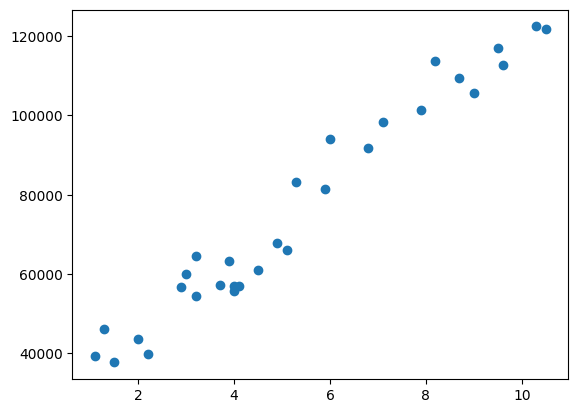

In [28]:
plt.scatter(x, y)
plt.show()

In [29]:
model.fit(x, y)

LinearRegression()

In [36]:
model.predict(pd.DataFrame({'YearsExperience': [11]}))

array([129741.78573467])

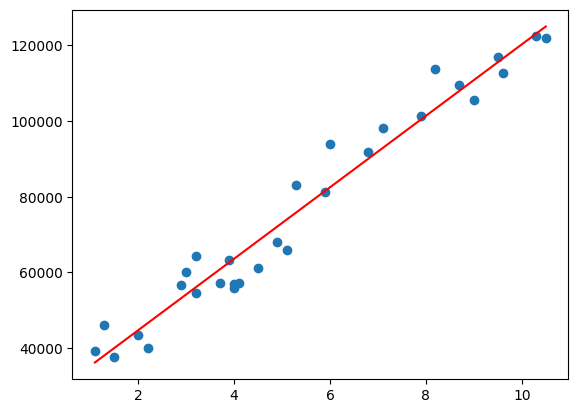

In [33]:
y_pred = model.predict(x)
plt.plot(x, y_pred, color='red')
plt.scatter(x, y)
plt.show()

#### Non Linear - using Liner Model

In [37]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [38]:
df['ExSq'] = df['YearsExperience'] ** 2

In [39]:
df

,YearsExperience,Salary,ExSq
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84
5,2.9,56642.0,8.41
6,3.0,60150.0,9.00
7,3.2,54445.0,10.24
8,3.2,64445.0,10.24
9,3.7,57189.0,13.69


In [40]:
x = df[['YearsExperience', 'ExSq']]
y = df['Salary']

In [41]:
model.fit(x, y)

LinearRegression()

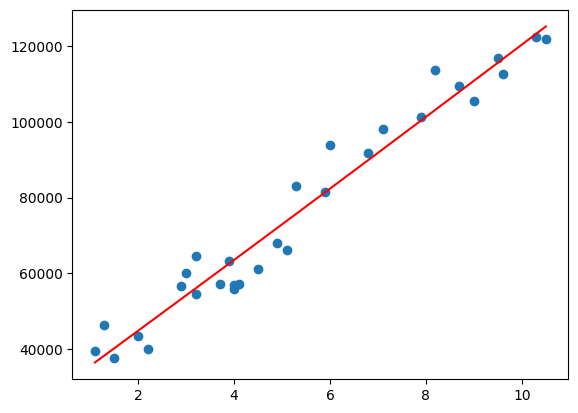

In [43]:
y_pred = model.predict(x)
plt.plot(x['YearsExperience'], y_pred, color='red')
plt.scatter(x['YearsExperience'], y)
plt.show()

In [44]:
df.corr()

,YearsExperience,Salary,ExSq
YearsExperience,1.000000,0.978242,0.977067
Salary,0.978242,1.000000,0.956724
ExSq,0.977067,0.956724,1.000000


#### R-Squared error

In [45]:
model.score(x,y)

0.956975168321065

#### MT-Cars Example: Multiple Regression

In [46]:
df = pd.read_csv('dataset/mtcars.csv')

In [47]:
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [48]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [49]:
x = df[['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']]
y = df['mpg']

In [51]:
df.corrwith(df['mpg'])

mpg     1.000000
cyl    -0.852162
disp   -0.847551
hp     -0.776168
drat    0.681172
wt     -0.867659
qsec    0.418684
vs      0.664039
am      0.599832
gear    0.480285
carb   -0.550925
dtype: float64

In [68]:
x = df[['cyl', 'disp', 'hp', 'wt']]

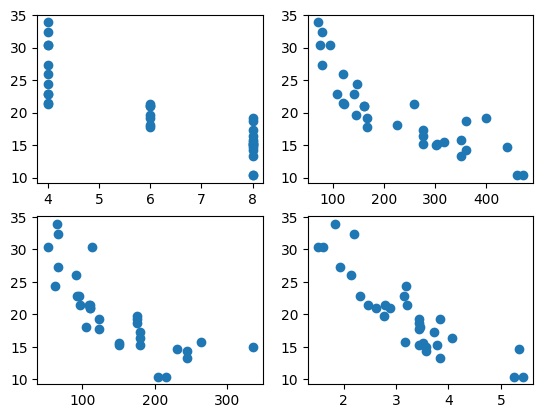

In [69]:
plt.figure()
plt.subplot(2,2,1)
plt.scatter(x['cyl'], y)
plt.subplot(2,2,2)
plt.scatter(x['disp'], y)
plt.subplot(2,2,3)
plt.scatter(x['hp'], y)
plt.subplot(2,2,4)
plt.scatter(x['wt'], y)

In [70]:
x['disp1'] = x['disp'] ** 2
x['hp1'] = x['hp'] ** 2

C:\Users\Dell\AppData\Local\Temp\ipykernel_34828\1494766024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['disp1'] = x['disp'] ** 2
C:\Users\Dell\AppData\Local\Temp\ipykernel_34828\1494766024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['hp1'] = x['hp'] ** 2


In [71]:
model.fit(x, y)

LinearRegression()

In [72]:
model.score(x, y)

0.8916787223934729

## Decision Tree

In [2]:
df = pd.read_csv('dataset/petrol_consumption.csv')

In [3]:
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [4]:
from sklearn.tree import DecisionTreeRegressor

In [5]:
model = DecisionTreeRegressor()

In [6]:
x = df.drop('Petrol_Consumption', axis=1)
y = df['Petrol_Consumption']

In [7]:
model.fit(x, y)

DecisionTreeRegressor()

In [9]:
new = pd.DataFrame(data=[[7, 4500, 8900, 0.59]], columns=df.columns[:-1])

In [10]:
new

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,7,4500,8900,0.59


In [11]:
model.predict(new)

array([587.])

## SVM

In [12]:
df = pd.read_csv('dataset/banknotes.csv')

In [13]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


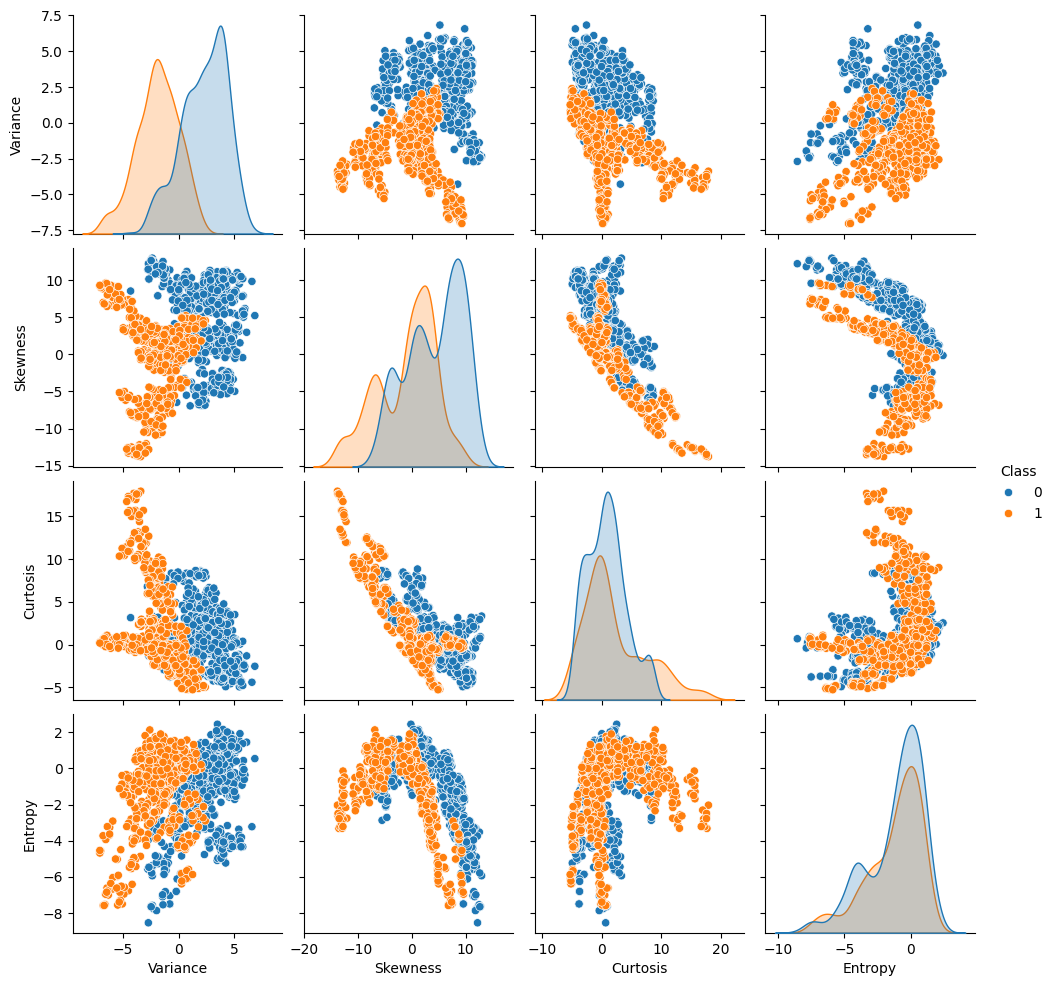

In [16]:
sns.pairplot(df, hue='Class')

In [15]:
x = df.drop('Class', axis=1)
y = df['Class']

#### Cross-Validation

In [17]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [23]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1029, 4), (1029,), (343, 4), (343,))

In [49]:
from sklearn.svm import SVC
model = SVC(kernel='sigmoid')

In [50]:
model.fit(x_train, y_train)

SVC(kernel='sigmoid')

In [51]:
y_pred = model.predict(x_test)

In [52]:
len(y_test.loc[y_test == y_pred])

234

In [53]:
sum(y_test == y_pred) / len(y_test)

0.6822157434402333

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(y_pred, y_test)

0.6822157434402333

## Ensemble Learning

#### Bagging: Bootstrap Aggregation: getting results from different models trained on different piece of data and aggregating the result

### Random Forest

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [63]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)
accuracy_score(y_pred_dt, y_test)

0.9795918367346939

In [64]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)
accuracy_score(y_pred_rf, y_test)

0.9912536443148688

In [66]:
%%time
y_pred_dt = dt.predict(x_test)

CPU times: total: 0 ns
Wall time: 4.12 ms


In [67]:
%%time
y_pred_rf = rf.predict(x_test)

CPU times: total: 0 ns
Wall time: 18.6 ms


In [76]:
import time

t1 = time.time()
y_pred_dt = dt.predict(x_test)
t2 = time.time()
print('DT: ', (t2 - t1)*1000)

y_pred_rf = rf.predict(x_test)
t3 = time.time()
print('RF: ', (t3 - t2)*1000)

DT:  4.1046142578125
RF:  16.318798065185547


## K-Means

In [78]:
df = pd.read_csv('dataset/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [79]:
x = df.iloc[:,3:]

In [80]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


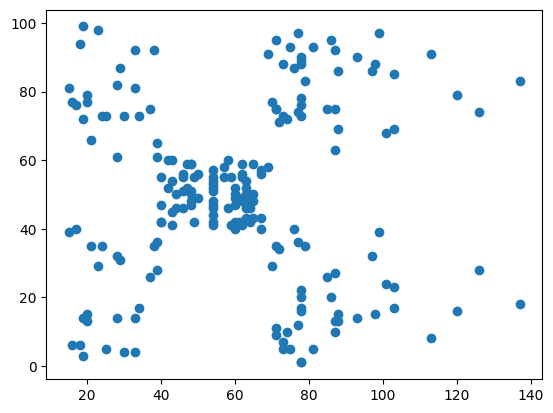

In [81]:
plt.scatter(x.iloc[:,0], x.iloc[:,1]);

In [82]:
from sklearn.cluster import KMeans

In [84]:
km = KMeans(n_clusters=3, random_state=0)

In [85]:
km.fit_predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [86]:
km.inertia_

106348.37306211119

In [87]:
sse = []
for i in range(1, 16):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit_predict(x)
    sse.append(km.inertia_)
sse

[269981.28,
 185917.14253928524,
 106348.37306211119,
 73679.78903948836,
 44448.45544793371,
 38858.9599751439,
 31969.426550235476,
 29858.483597603947,
 22209.851608025547,
 20786.936692059156,
 18612.22286800968,
 17083.67250170932,
 16511.947370563896,
 15599.148331445118,
 14697.298899626936]

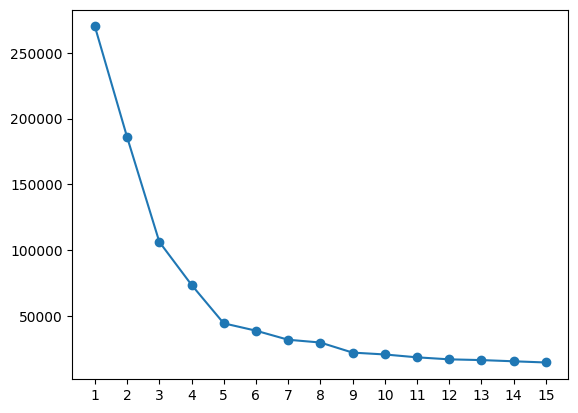

In [91]:
plt.xticks(range(1,16))
plt.plot(range(1,16), sse, marker='o')

In [93]:
km = KMeans(n_clusters=5, random_state=0)
y = km.fit_predict(x)

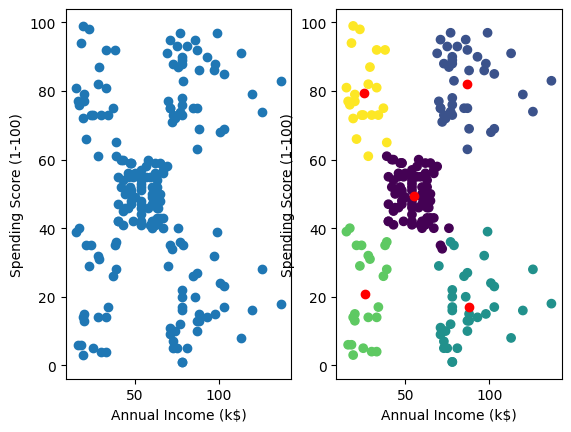

In [103]:
plt.figure()
plt.subplot(1,2,1)
plt.xlabel(x.columns[0])
plt.ylabel(x.columns[1])
plt.scatter(x.iloc[:,0], x.iloc[:,1])
plt.subplot(1,2,2)
plt.xlabel(x.columns[0])
plt.ylabel(x.columns[1])
plt.scatter(x.iloc[:,0], x.iloc[:,1], c=y)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='r')

In [106]:
x['label'] = y

In [107]:
x

,Annual Income (k$),Spending Score (1-100),label
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3
...,...,...,...
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,2


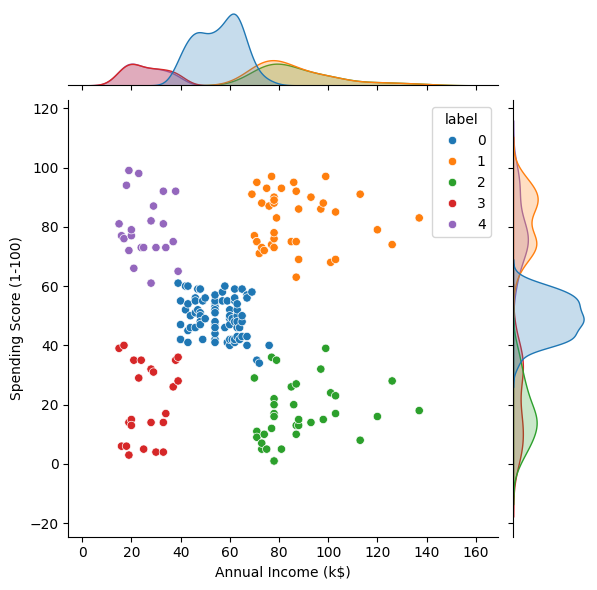

In [111]:
sns.jointplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=x, hue='label', palette='tab10');